In [101]:
import csv
from scipy import stats
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
import pylab
from random import gauss
from random import seed
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial.distance import euclidean

In [5]:
num = []
data = []

with open("Davis.csv", 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        num.append(int(row[0]))  #標本番号を取得
        data.append(int(row[2])) #体重データを取得

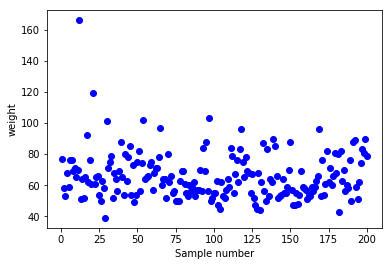

In [10]:
plt.plot(num, data, "o", color = "b")
# plt.plot([0,200],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("weight")
# plt.ylim([0,100])
plt.show()

In [20]:
wave_data = Series.from_csv('../data/daily-minimum-temperatures-in-me.csv', header=0, ) 

/Users/masayaoogushi/Study/time_series_keras/time_series_python/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [41]:
X_orig = np.array(wave_data.values, dtype=float)

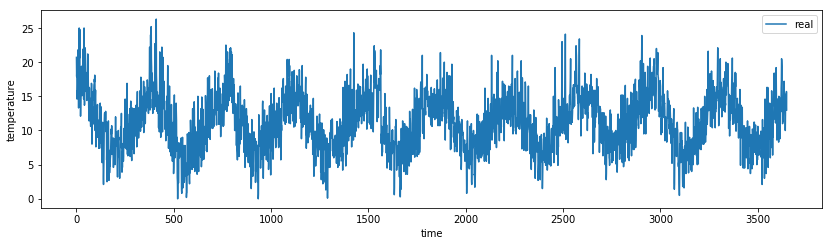

In [42]:
pylab.figure(figsize=(14, 8))
pylab.subplot(211)
pylab.xlabel('time')
pylab.ylabel('temperature')
pylab.plot(X_orig, label='real')
pylab.legend(loc='upper right')
pylab.show()

In [97]:
series = [gauss(0.0, 10.0) for i in range(100)]
series_small = [gauss(0.0, 1.0) for i in range(100)]

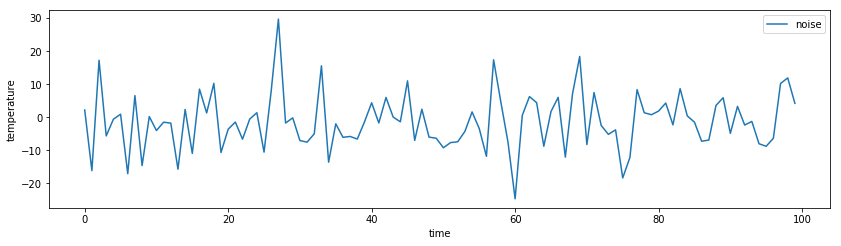

In [98]:
pylab.figure(figsize=(14, 8))
pylab.subplot(211)
pylab.xlabel('time')
pylab.ylabel('temperature')
pylab.plot(series, label='noise')
pylab.legend(loc='upper right')
pylab.show()

46.410180814388696


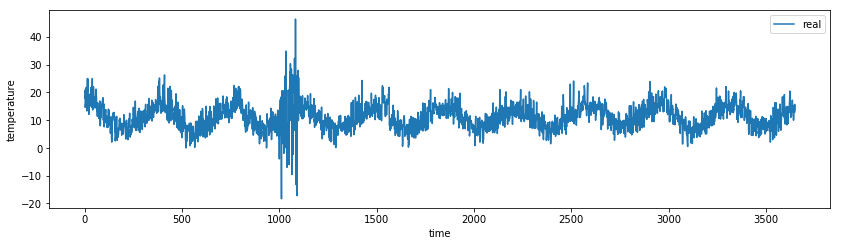

In [61]:
X = X_orig.copy() 
X[1000:1100] = X[1000:1100] + series
print(np.max(X))
pylab.figure(figsize=(14, 8))
pylab.subplot(211)
pylab.xlabel('time')
pylab.ylabel('temperature')
pylab.plot(X, label='real')
pylab.legend(loc='upper right')
pylab.show()

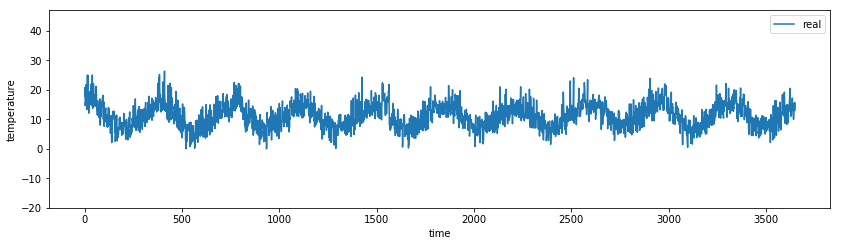

In [62]:
pylab.figure(figsize=(14, 8))
pylab.subplot(211)
pylab.xlabel('time')
pylab.ylabel('temperature')
pylab.plot(X_orig, label='real')
pylab.legend(loc='upper right')
pylab.ylim([-20, 47])
pylab.show()

In [67]:
mse_array = np.zeros((len(X)))
for index, (x, x_n) in enumerate(zip(X, X_orig)):
    mse_array[index] = (x - x_n) ** 2

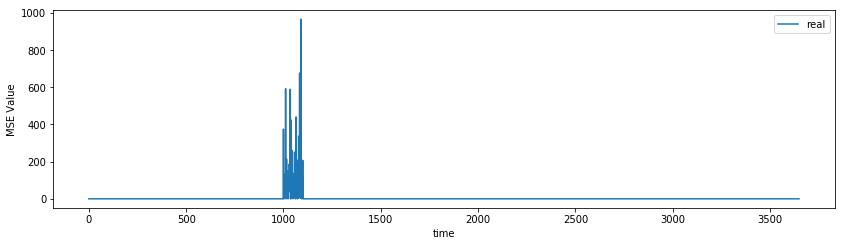

In [69]:
pylab.figure(figsize=(14, 8))
pylab.subplot(211)
pylab.xlabel('time')
pylab.ylabel('MSE Value')
pylab.plot(mse_array, label='real')
pylab.legend(loc='upper right')
# pylab.ylim([-20, 47])
pylab.show()

0.0


(<matplotlib.figure.Figure at 0x107f0ec50>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x103b71c50>,
       dtype=object))

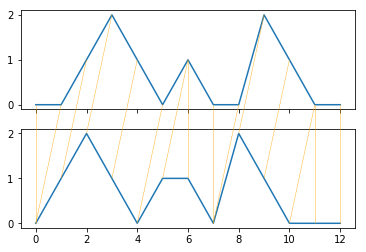

In [85]:
from dtaidistance import dtw
import numpy as np
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0])

# s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
distance = dtw.distance(s1, s2)
print(distance)

def plot_warping(s1, s2, path, filename=None):

    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
    ax[0].plot(s1)
    ax[1].plot(s2)
    transFigure = fig.transFigure.inverted()
    lines = []
    line_options = {'linewidth': 0.5, 'color': 'orange', 'alpha': 0.8}
    for r_c, c_c in path:
        if r_c < 0 or c_c < 0:
            continue
        coord1 = transFigure.transform(ax[0].transData.transform([r_c, s1[r_c]]))
        coord2 = transFigure.transform(ax[1].transData.transform([c_c, s2[c_c]]))
        lines.append(mpl.lines.Line2D((coord1[0], coord2[0]), (coord1[1], coord2[1]),
                                      transform=fig.transFigure, **line_options))
    fig.lines = lines
    if filename:
        plt.savefig(filename)
    return fig, ax

plot_warping(s1, s2, path, filename="warp.png")


In [95]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

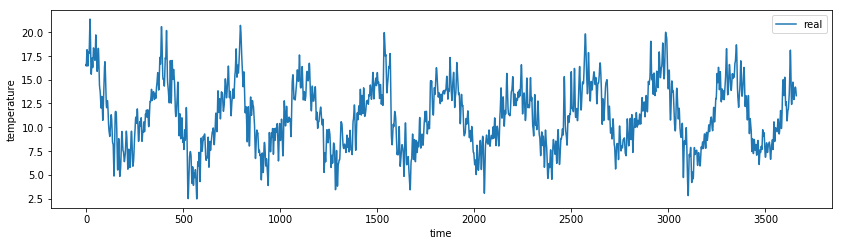

In [96]:
X_smooth = smooth(X_orig)
pylab.figure(figsize=(14, 8))
pylab.subplot(211)
pylab.xlabel('time')
pylab.ylabel('temperature')
pylab.plot(X_smooth, label='real')
pylab.legend(loc='upper right')
pylab.show()

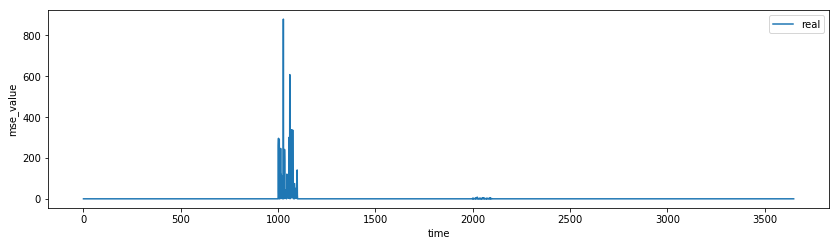

In [99]:
X2 = X_orig.copy() 
X2[1000:1100] = X2[1000:1100] + series
X2[2000:2100] = X2[2000:2100] + series_small
mse_array = np.zeros((len(X2)))
for index, (x, x_n) in enumerate(zip(X2, X_orig)):
    mse_array[index] = (x - x_n) ** 2

pylab.figure(figsize=(14, 8))
pylab.subplot(211)
pylab.xlabel('time')
pylab.ylabel('mse_value')
pylab.plot(mse_array, label='real')
pylab.legend(loc='upper right')
pylab.show()

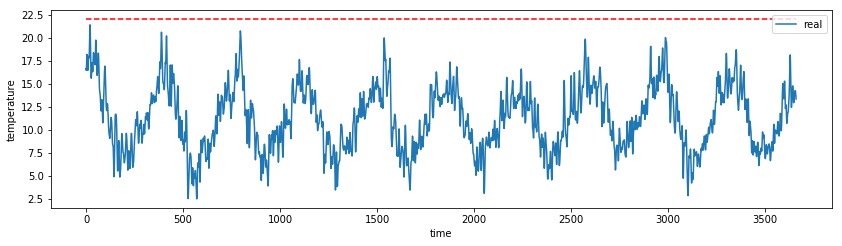

In [100]:
threshold = 22

X_smooth = smooth(X_orig)
pylab.figure(figsize=(14, 8))
pylab.subplot(211)
pylab.xlabel('time')
pylab.ylabel('temperature')

pylab.plot([0,len(X_smooth)],[threshold, threshold], 'k-', color = "r", ls = "dashed")
pylab.plot(X_smooth, label='real')
pylab.legend(loc='upper right')
pylab.show()

In [102]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0])


print(euclidean(s1, s2))

3.3166247903554
